In [1]:
from datasets import load_dataset
import os
import csv
import h5py
import random
from tqdm import tqdm
import json

ds_rel = load_dataset('visual_genome', 'relationships_v1.2.0', cache_dir='/data/hulab/zcai75/visual_genome')
ds_attr = load_dataset('visual_genome', 'attributes_v1.2.0', cache_dir='/data/hulab/zcai75/visual_genome')

data_dir = '../../dataset/OFA_data/vg_full'
vg_dir = '/data/hulab/zcai75/visual_genome'
image_dir = os.path.join(vg_dir, 'VG_100K')

def get_box(box):
    return ' '.join(map(str, [box['x'], box['y'], box['x'] + box['w'], box['y'] + box['h']]))

/data/hulab/zcai75/anaconda3/envs/vilt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset visual_genome (/data/hulab/zcai75/visual_genome/visual_genome/relationships_v1.2.0/1.2.0/6a4c7ae0afc696f22ba83bf725357bff6d74714cf3d24d4f07f5aed78d56b626)
100%|██████████| 1/1 [00:00<00:00,  6.33it/s]
Found cached dataset visual_genome (/data/hulab/zcai75/visual_genome/visual_genome/attributes_v1.2.0/1.2.0/6a4c7ae0afc696f22ba83bf725357bff6d74714cf3d24d4f07f5aed78d56b626)
100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


In [8]:
print(ds_rel['train'][0]['image'])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7F3C3CAB83D0>


In [3]:
import matplotlib.pyplot as plt
from collections import defaultdict

# plot the distribution of predicate labels
counter = defaultdict(int)
for sample in tqdm(ds_rel['train']):
    for r in sample['relationships']:
        counter[r['predicate'].lower()] += 1

# sort by value
counter = sorted(counter.items(), key=lambda item: item[1], reverse=True)

100%|██████████| 108077/108077 [04:12<00:00, 428.11it/s]


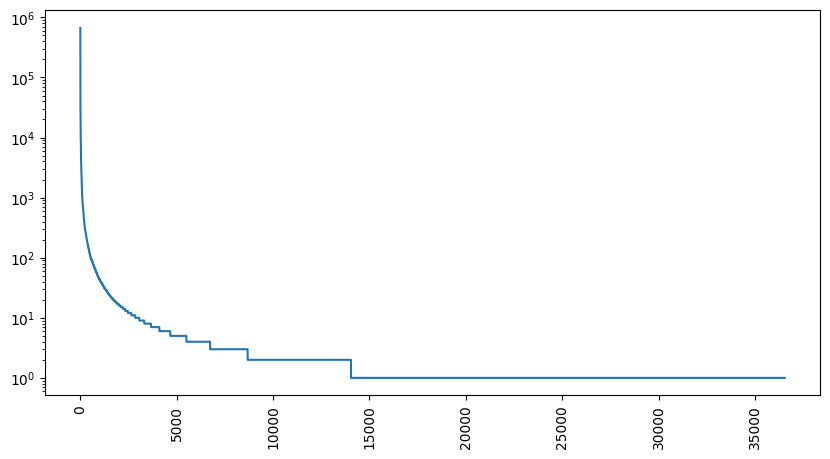

In [4]:
# use log scale
plt.figure(figsize=(10, 5))
plt.plot([i[1] for i in counter])
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()